In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/zainsiddiqi/Data Analyst upskilling/CovidData/VaccinationsvsDeaths.csv')
df['date'] = pd.to_datetime(df['date'])
df_UK = df[df['location'] == 'United Kingdom'].copy()
df_UK[['date', 'cumulative_deaths', 'cumulative_vaccinations']]

,date,cumulative_deaths,cumulative_vaccinations
372333,2020-01-05,0,0
372334,2020-01-06,0,0
372335,2020-01-07,0,0
372336,2020-01-08,0,0
372337,2020-01-09,0,0
...,...,...,...
373974,2024-07-03,232112,148342453
373975,2024-07-04,232112,148342453
373976,2024-07-05,232112,148342453
373977,2024-07-06,232112,148342453


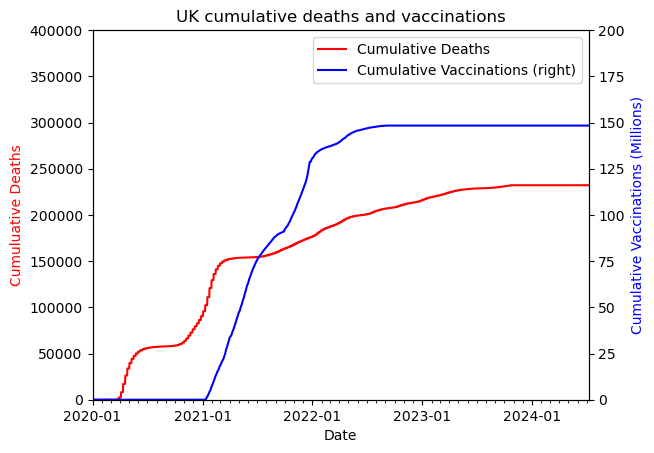

In [33]:
import matplotlib.pyplot as plt 
from matplotlib.ticker import ScalarFormatter, FuncFormatter
import matplotlib.dates as mdates
ax = df_UK.plot(x='date', y='cumulative_deaths', label= 'Cumulative Deaths', color = 'r')
df_UK.plot(x = 'date', y = 'cumulative_vaccinations', label = 'Cumulative Vaccinations', color = 'b', ax = ax, secondary_y = True)
ax.set_xlabel('Date')
ax.set_ylabel('Cumuluative Deaths', color = 'r')
ax.right_ax.set_ylabel('Cumulative Vaccinations (Millions)', color = 'b')
ax.set_ylim(0,400000)
ax.right_ax.set_ylim(0,200000000)
ax.set_xlim([pd.Timestamp('2020-01'),df_UK['date'].max()])

def millions(x, pos):
    'The two args are the value and tick position'
    return '%d' % (x * 1e-6)

formatter = FuncFormatter(millions)
ax.right_ax.yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('UK cumulative deaths and vaccinations')
plt.show()